In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/cleaned/jobs_cleaned.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_usd,employee_country,remote_ratio,company_country,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


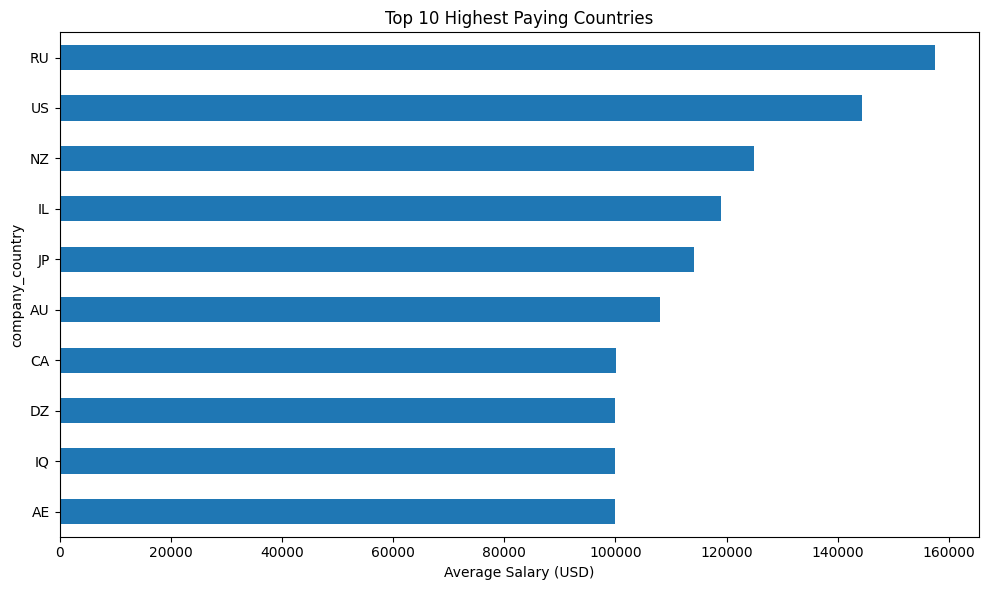

In [39]:
salary_by_country = (
    df.groupby("company_country")["salary_usd"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
salary_by_country.plot(kind="barh")
plt.title("Top 10 Highest Paying Countries")
plt.xlabel("Average Salary (USD)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../dashboard/salary_by_country.png")
plt.show()

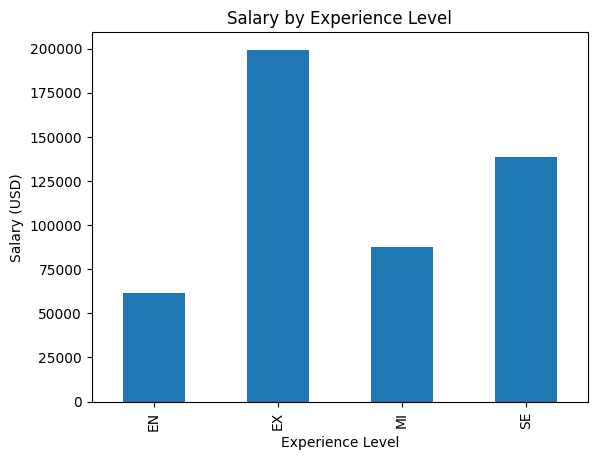

In [40]:
df.groupby("experience_level")["salary_usd"].mean().plot(kind="bar")
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.savefig("../dashboard/salary_by_experience.png")
plt.show()

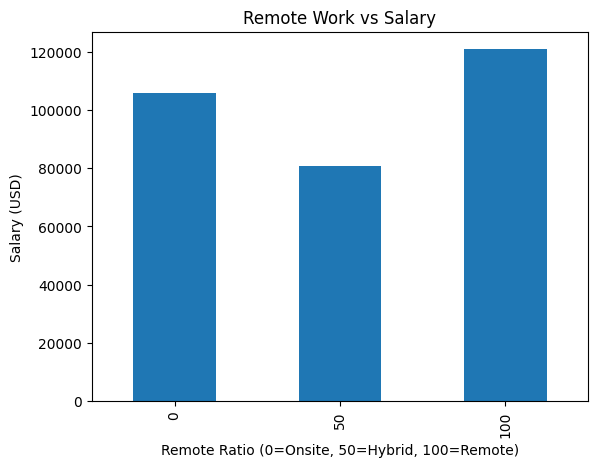

In [41]:
df.groupby("remote_ratio")["salary_usd"].mean().plot(kind="bar")
plt.title("Remote Work vs Salary")
plt.xlabel("Remote Ratio (0=Onsite, 50=Hybrid, 100=Remote)")
plt.ylabel("Salary (USD)")
plt.savefig("../dashboard/remote_work_impact.png")
plt.show()

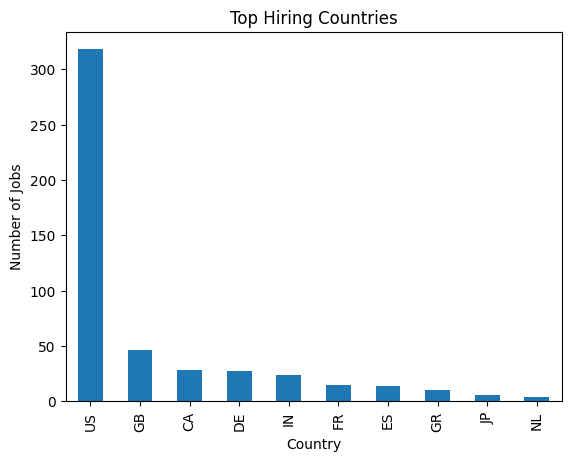

In [42]:
df["company_country"].value_counts().head(10).plot(kind="bar")
plt.title("Top Hiring Countries")
plt.xlabel("Country")
plt.ylabel("Number of Jobs")
plt.savefig("../dashboard/hiring_hotspots.png")
plt.show()